## Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Import the Dataset

In [2]:
dataset = pd.read_csv('melb_data.csv')
dataset.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

## Exploratory Data Analysis

In [4]:
dataset.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


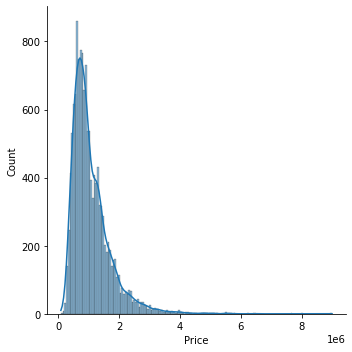

In [5]:
sns.displot(data = dataset['Price'], kde = True)

In [6]:
# Normality test of the output variable
from scipy.stats.mstats import normaltest 

normaltest(dataset.Price)

NormaltestResult(statistic=6894.345896172315, pvalue=0.0)

In [7]:
# Make the output variable Normally Distributed
from scipy.stats import boxcox

bc_result = boxcox(dataset.Price)
boxcox_price = bc_result[0]
normaltest(boxcox_price)

NormaltestResult(statistic=0.5748894178634879, pvalue=0.7501780437697397)

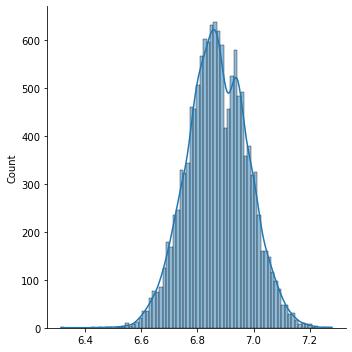

In [8]:
sns.displot(data = boxcox_price, kde = True)

## Pre-processing Steps

In [9]:
data = dataset.drop(['Address', 'BuildingArea', 'YearBuilt'], axis = 1)

In [10]:
data['Date'] = np.float64(data['Date'].apply(lambda x: x[-4:]))

In [11]:
missing_data = dataset.isnull()

for column in missing_data.columns.values.tolist():
    print(column)
    print(str(np.sum(missing_data[column])) + ' missing values - ' + str(np.sum(missing_data[column]) / 13580 * 100) + " %" )
    print("")

Suburb
0 missing values - 0.0 %

Address
0 missing values - 0.0 %

Rooms
0 missing values - 0.0 %

Type
0 missing values - 0.0 %

Price
0 missing values - 0.0 %

Method
0 missing values - 0.0 %

SellerG
0 missing values - 0.0 %

Date
0 missing values - 0.0 %

Distance
0 missing values - 0.0 %

Postcode
0 missing values - 0.0 %

Bedroom2
0 missing values - 0.0 %

Bathroom
0 missing values - 0.0 %

Car
62 missing values - 0.45655375552282773 %

Landsize
0 missing values - 0.0 %

BuildingArea
6450 missing values - 47.49631811487481 %

YearBuilt
5375 missing values - 39.58026509572901 %

CouncilArea
1369 missing values - 10.08100147275405 %

Lattitude
0 missing values - 0.0 %

Longtitude
0 missing values - 0.0 %

Regionname
0 missing values - 0.0 %

Propertycount
0 missing values - 0.0 %



In [ ]:
for column in data.columns.values.tolist():
    if(data[column].dtype == np.float64):
        mean = data[column].mean()
        data[column].replace(np.NaN, mean, inplace = True)
    else:
        most_common = data[column].value_counts().idxmax()
        data[column].replace(np.NaN, most_common, inplace = True)

In [ ]:
# Determine how many extra columns would be created by applying one hot encoding
mask = data.dtypes == object
categorical_cols = data.columns[mask]

num_ohc_cols = (data[categorical_cols].apply(lambda x: x.nunique())
                .sort_values(ascending = False)
               )

num_ohc_cols.sum()

In [ ]:
categorical_cols

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

#copy the data
data_ohc = data.copy()

le = LabelEncoder()
ohc = OneHotEncoder()

for col in num_ohc_cols.index:
    dat = le.fit_transform(data_ohc[col]).astype(np.int)
    
    # remove the original column from the dataframe
    data_ohc = data_ohc.drop(col, axis = 1)
    
    # one hot encode the data
    new_dat = ohc.fit_transform(dat.reshape(-1, 1))
    
    n_cols = new_dat.shape[1]
    col_names = ['_'.join([col, str(x)]) for x in range(n_cols)]
    
    new_df = pd.DataFrame(new_dat.toarray(), index = data_ohc.index, columns = col_names)
    
    data_ohc = pd.concat([data_ohc, new_df], axis = 1)

In [ ]:
data_ohc.head()

In [ ]:
data_ohc.dtypes

In [ ]:
data_ohc.shape

### Normal Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
X = np.concatenate((data_ohc.iloc[:, 0].values.reshape(13580, 1), data_ohc.iloc[:, 2:].values), axis = 1)
y = data_ohc.iloc[:, 1].values

In [ ]:
#splitting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
#Fitting Multiple Linear Regression to the training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

In [ ]:
#predicting the test set results
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score

r2_score(y_pred,y_test)

## Standardised Variables

In [ ]:
from sklearn.preprocessing import StandardScaler

s = StandardScaler()
X_train_s = s.fit_transform(X_train)

bc_result2 = boxcox(y_train)
y_train_bc = bc_result2[0]
lam2 = bc_result2[1]

In [ ]:
regressor.fit(X_train_s, y_train_bc)
X_test_s = s.transform(X_test)
y_pred_bc = regressor.predict(X_test_s)

In [ ]:
from scipy.special import inv_boxcox

y_pred_tran = inv_boxcox(y_pred_bc,lam2)
where_are_NaNs = np.isnan(y_pred_tran)
y_pred_tran[where_are_NaNs] = 0

r2_score(y_pred_tran,y_test)

## Ridge Regression

In [ ]:
from sklearn.linear_model import RidgeCV

alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]

X_train_s = s.fit_transform(X_train)

ridgeCV = RidgeCV(alphas=alphas, 
                  cv=4).fit(X_train_s, y_train)

X_test_s = s.fit_transform(X_test)

r2_score(ridgeCV.predict(X_test_s), y_test)